In [8]:
from utils.Auger.SD import Monitoring

In [10]:
monitoring = Monitoring.Monit('/cr/data01/filip/Data/daqIntegrationTests/v14/mc_2024_09_16_07h20.root')

12:34:03 (  +24.7s) [INFO   ] -- received 1 file(s) as input
12:34:03 (  +122ms) [INFO   ] -- View monit keys with self.keys()


In [3]:
monitoring.keys()

{
  "TObject": {
    "fUniqueID": "TObject/fUniqueID",
    "fBits": "TObject/fBits"
  },
  "fLsId": "fLsId",
  "fTime": "fTime",
  "fCDASTime": "fCDASTime",
  "fMonitoring": {
    "fIsMonitoring": "fMonitoring/fMonitoring.fIsMonitoring",
    "fIsUUB": "fMonitoring/fMonitoring.fIsUUB",
    "fPMV": "fMonitoring/fMonitoring.fPMV[3]",
    "fPMI": "fMonitoring/fMonitoring.fPMI[3]",
    "fPMT": "fMonitoring/fMonitoring.fPMT[3]",
    "fElectT": "fMonitoring/fMonitoring.fElectT",
    "fBatteryT[2]": "fMonitoring/fMonitoring.fBatteryT[2]",
    "fBatteryV[2]": "fMonitoring/fMonitoring.fBatteryV[2]",
    "fCurrentLoad": "fMonitoring/fMonitoring.fCurrentLoad",
    "fSolarPanelV": "fMonitoring/fMonitoring.fSolarPanelV",
    "fSolarPanelI": "fMonitoring/fMonitoring.fSolarPanelI",
    "fWaterLevel": "fMonitoring/fMonitoring.fWaterLevel",
    "fWaterT": "fMonitoring/fMonitoring.fWaterT",
    "f12VRadio": "fMonitoring/fMonitoring.f12VRadio",
    "f3V": "fMonitoring/fMonitoring.f3V",
    "f_3V": "fMonit

In [116]:
t = monitoring('fTime', 136)
vem = monitoring('fPeak', 136)
t70 = monitoring('f70HzRate', 136)
mask = [True if v[-1] != 0 else False for v in vem]
# mask = [True for v in vem]

14:38:33 (+3815.2s) [INFO   ] -- found 225 entries for key fTime and station #136
14:38:33 (   +15ms) [INFO   ] -- found 225 entries for key fPeak and station #136
14:38:33 (   +35ms) [INFO   ] -- found 225 entries for key f70HzRate and station #136


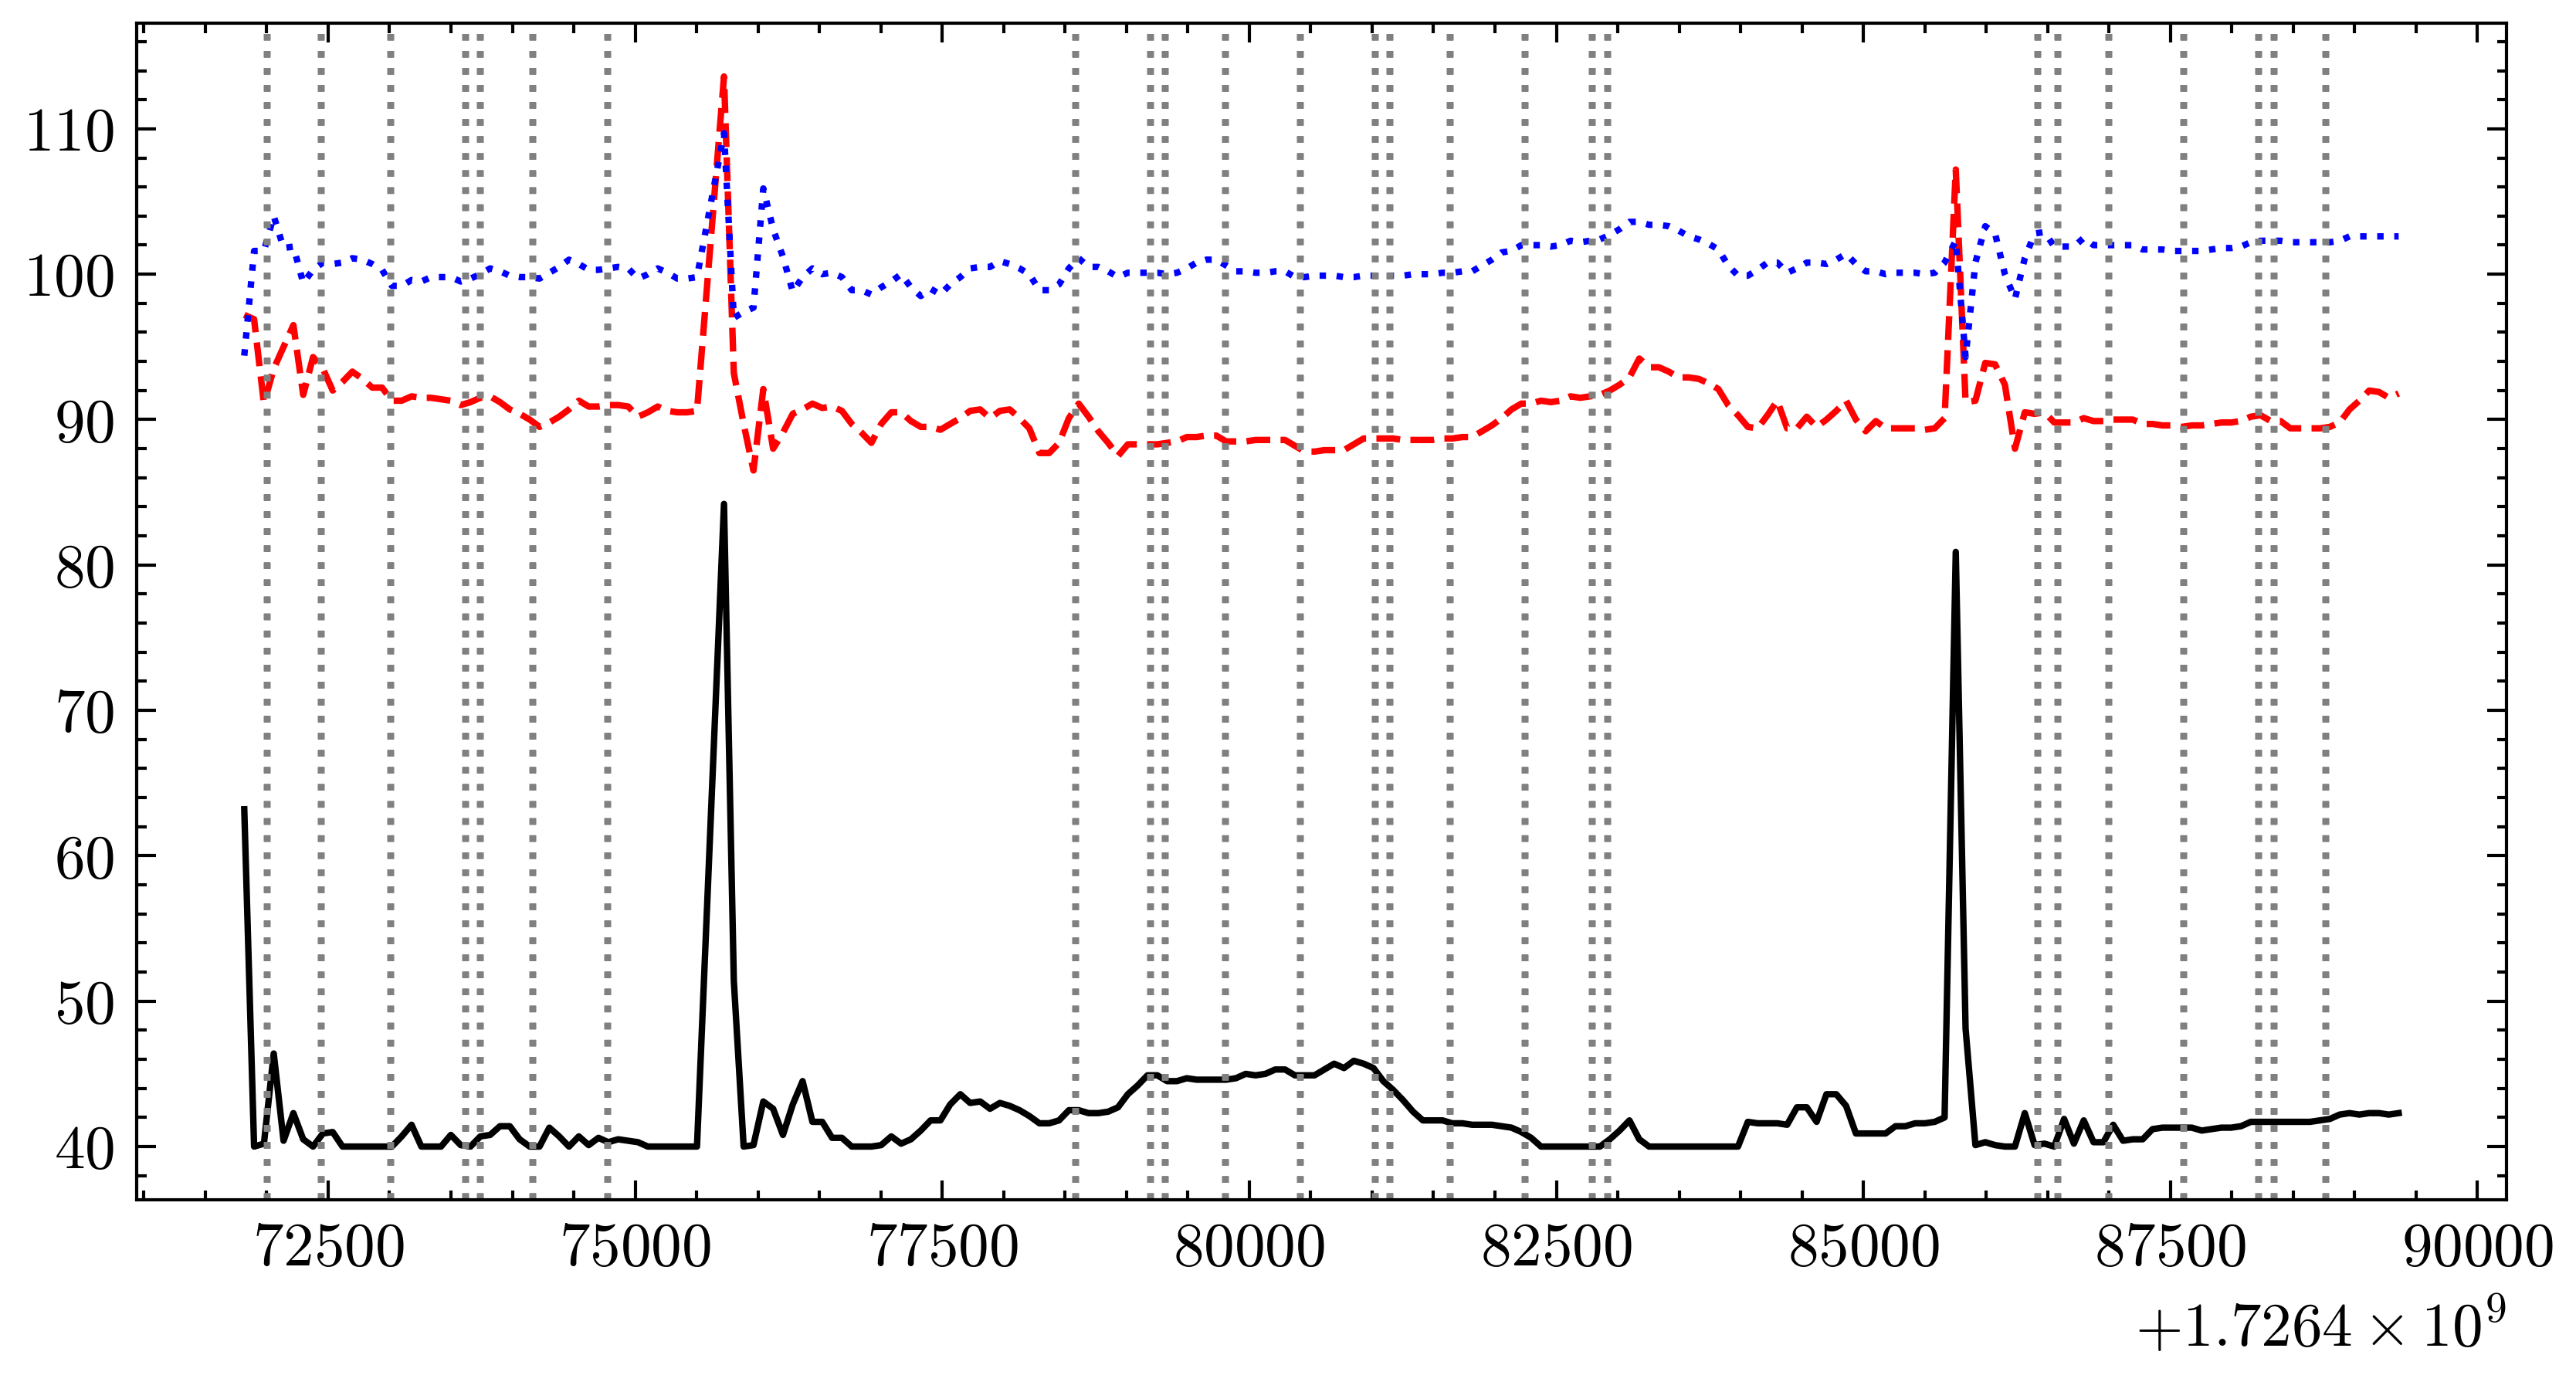

In [118]:
from utils.binaries import *
from utils.plotting import *
from utils import CONSTANTS

id, time, *histo = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v14/out.txt', unpack=True)
plt.plot(t[mask], vem[mask])

for ts in time:
    plt.axvline(ts + CONSTANTS.GPS_OFFSET, c='gray', ls=':')

# plt.axvline(1410518115 + CONSTANTS.GPS_OFFSET)
# plt.axvline(1410517444 + CONSTANTS.GPS_OFFSET)

In [84]:
import polars as pl

histos = pl.read_csv('/cr/data01/filip/Data/daqIntegrationTests/v14/out.txt', separator=' ', new_columns=['id', 't', 'pmt'] + [str(_) for _ in range(151)])
histos.drop_in_place('150')
histos = histos.with_columns(
    pl.concat_list(pl.col('*')
                   .exclude('id', 't', 'pmt'))
                   .alias('histo')
).select('t', 'pmt', 'histo')

ssds_histos = histos.filter(pl.col('pmt') == 3)
wcd3_histos = histos.filter(pl.col('pmt') == 2)
wcd2_histos = histos.filter(pl.col('pmt') == 1)
wcd1_histos = histos.filter(pl.col('pmt') == 0)

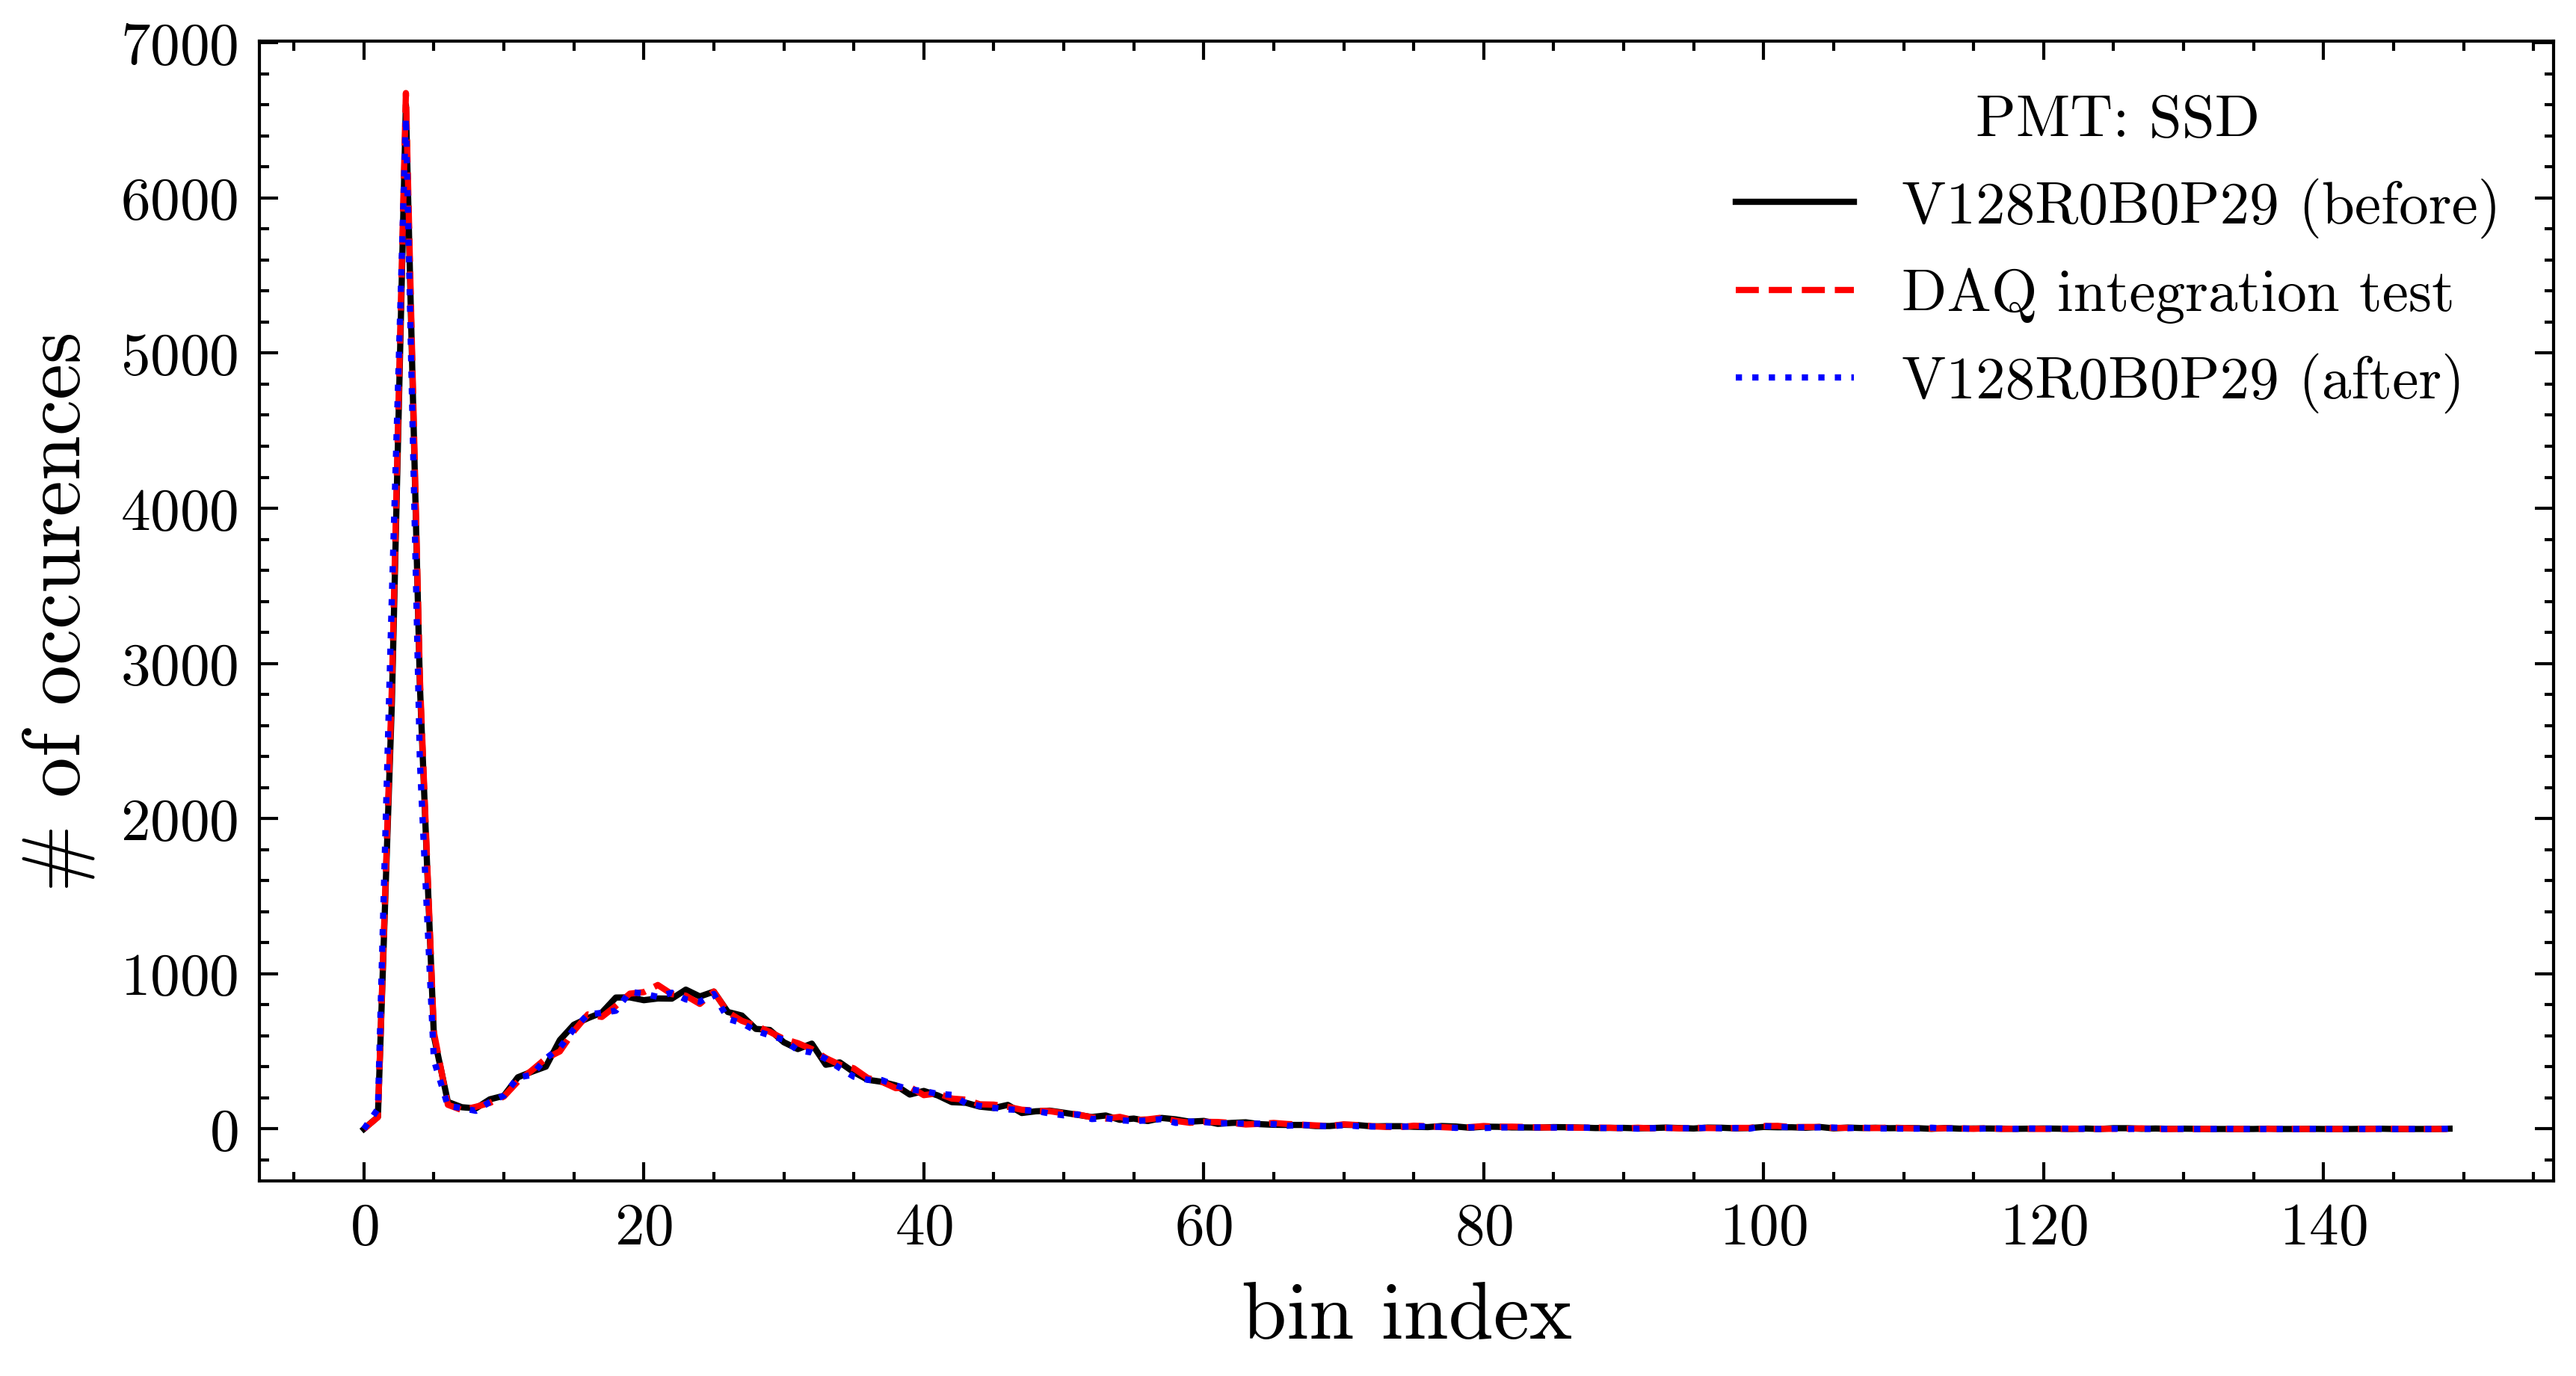

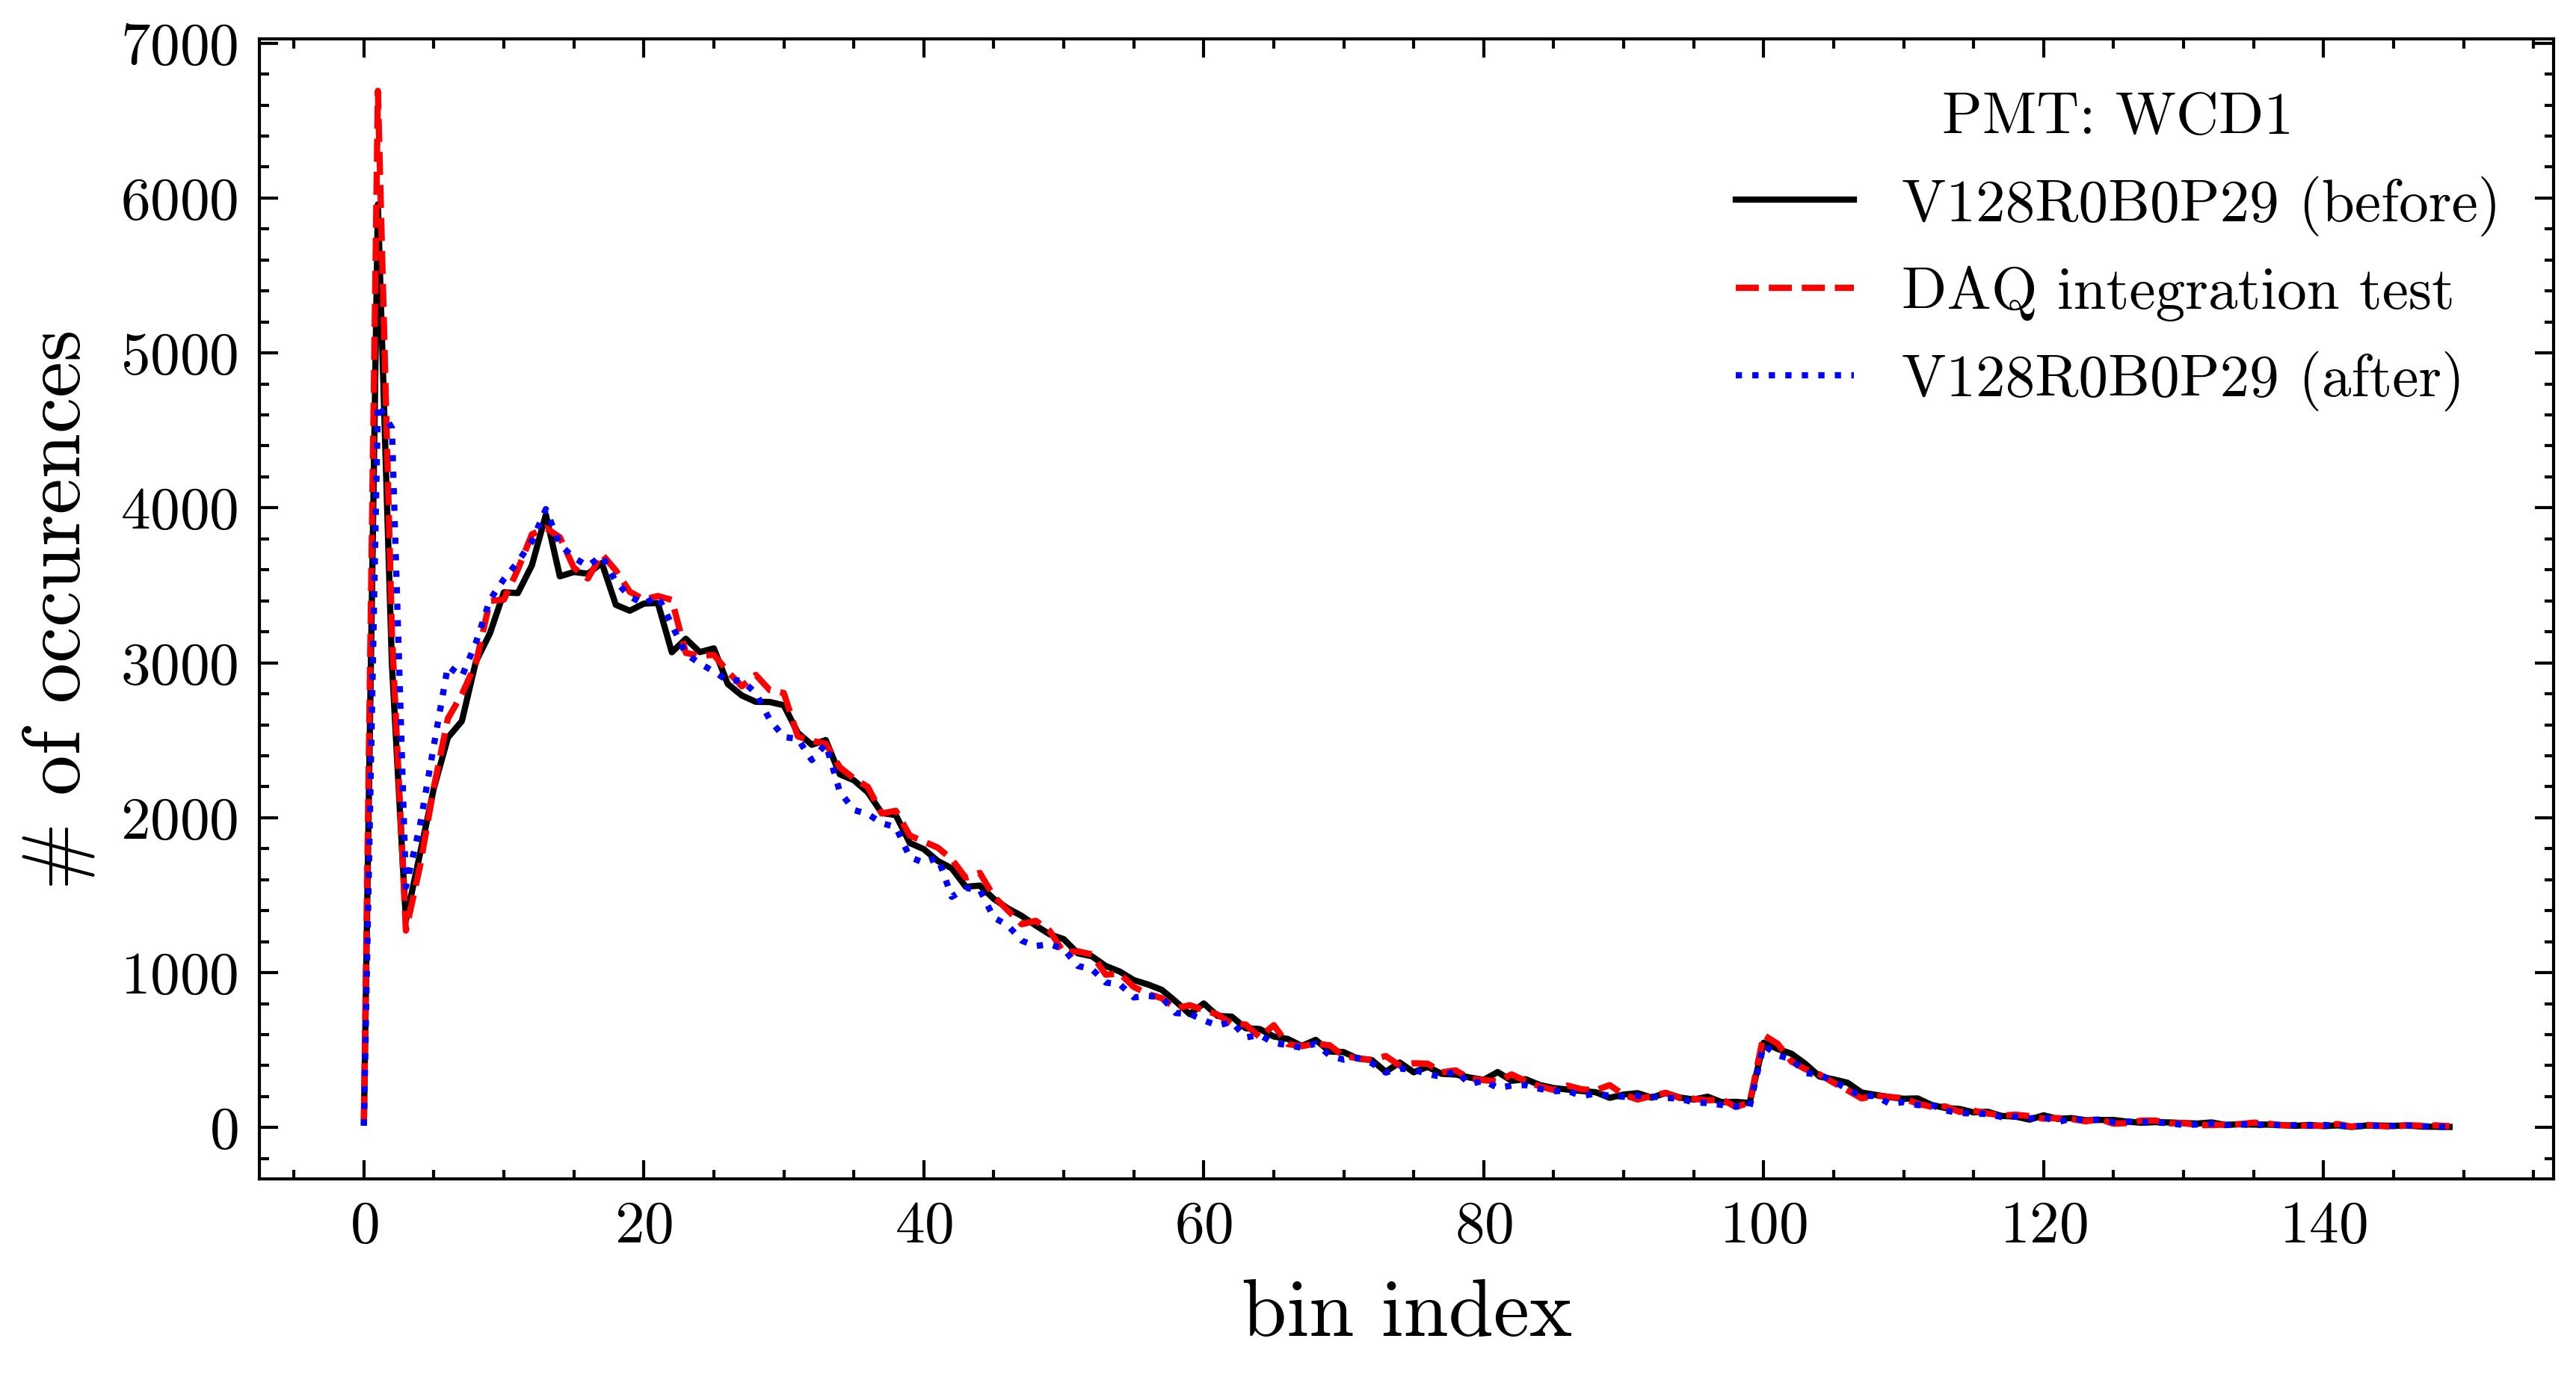

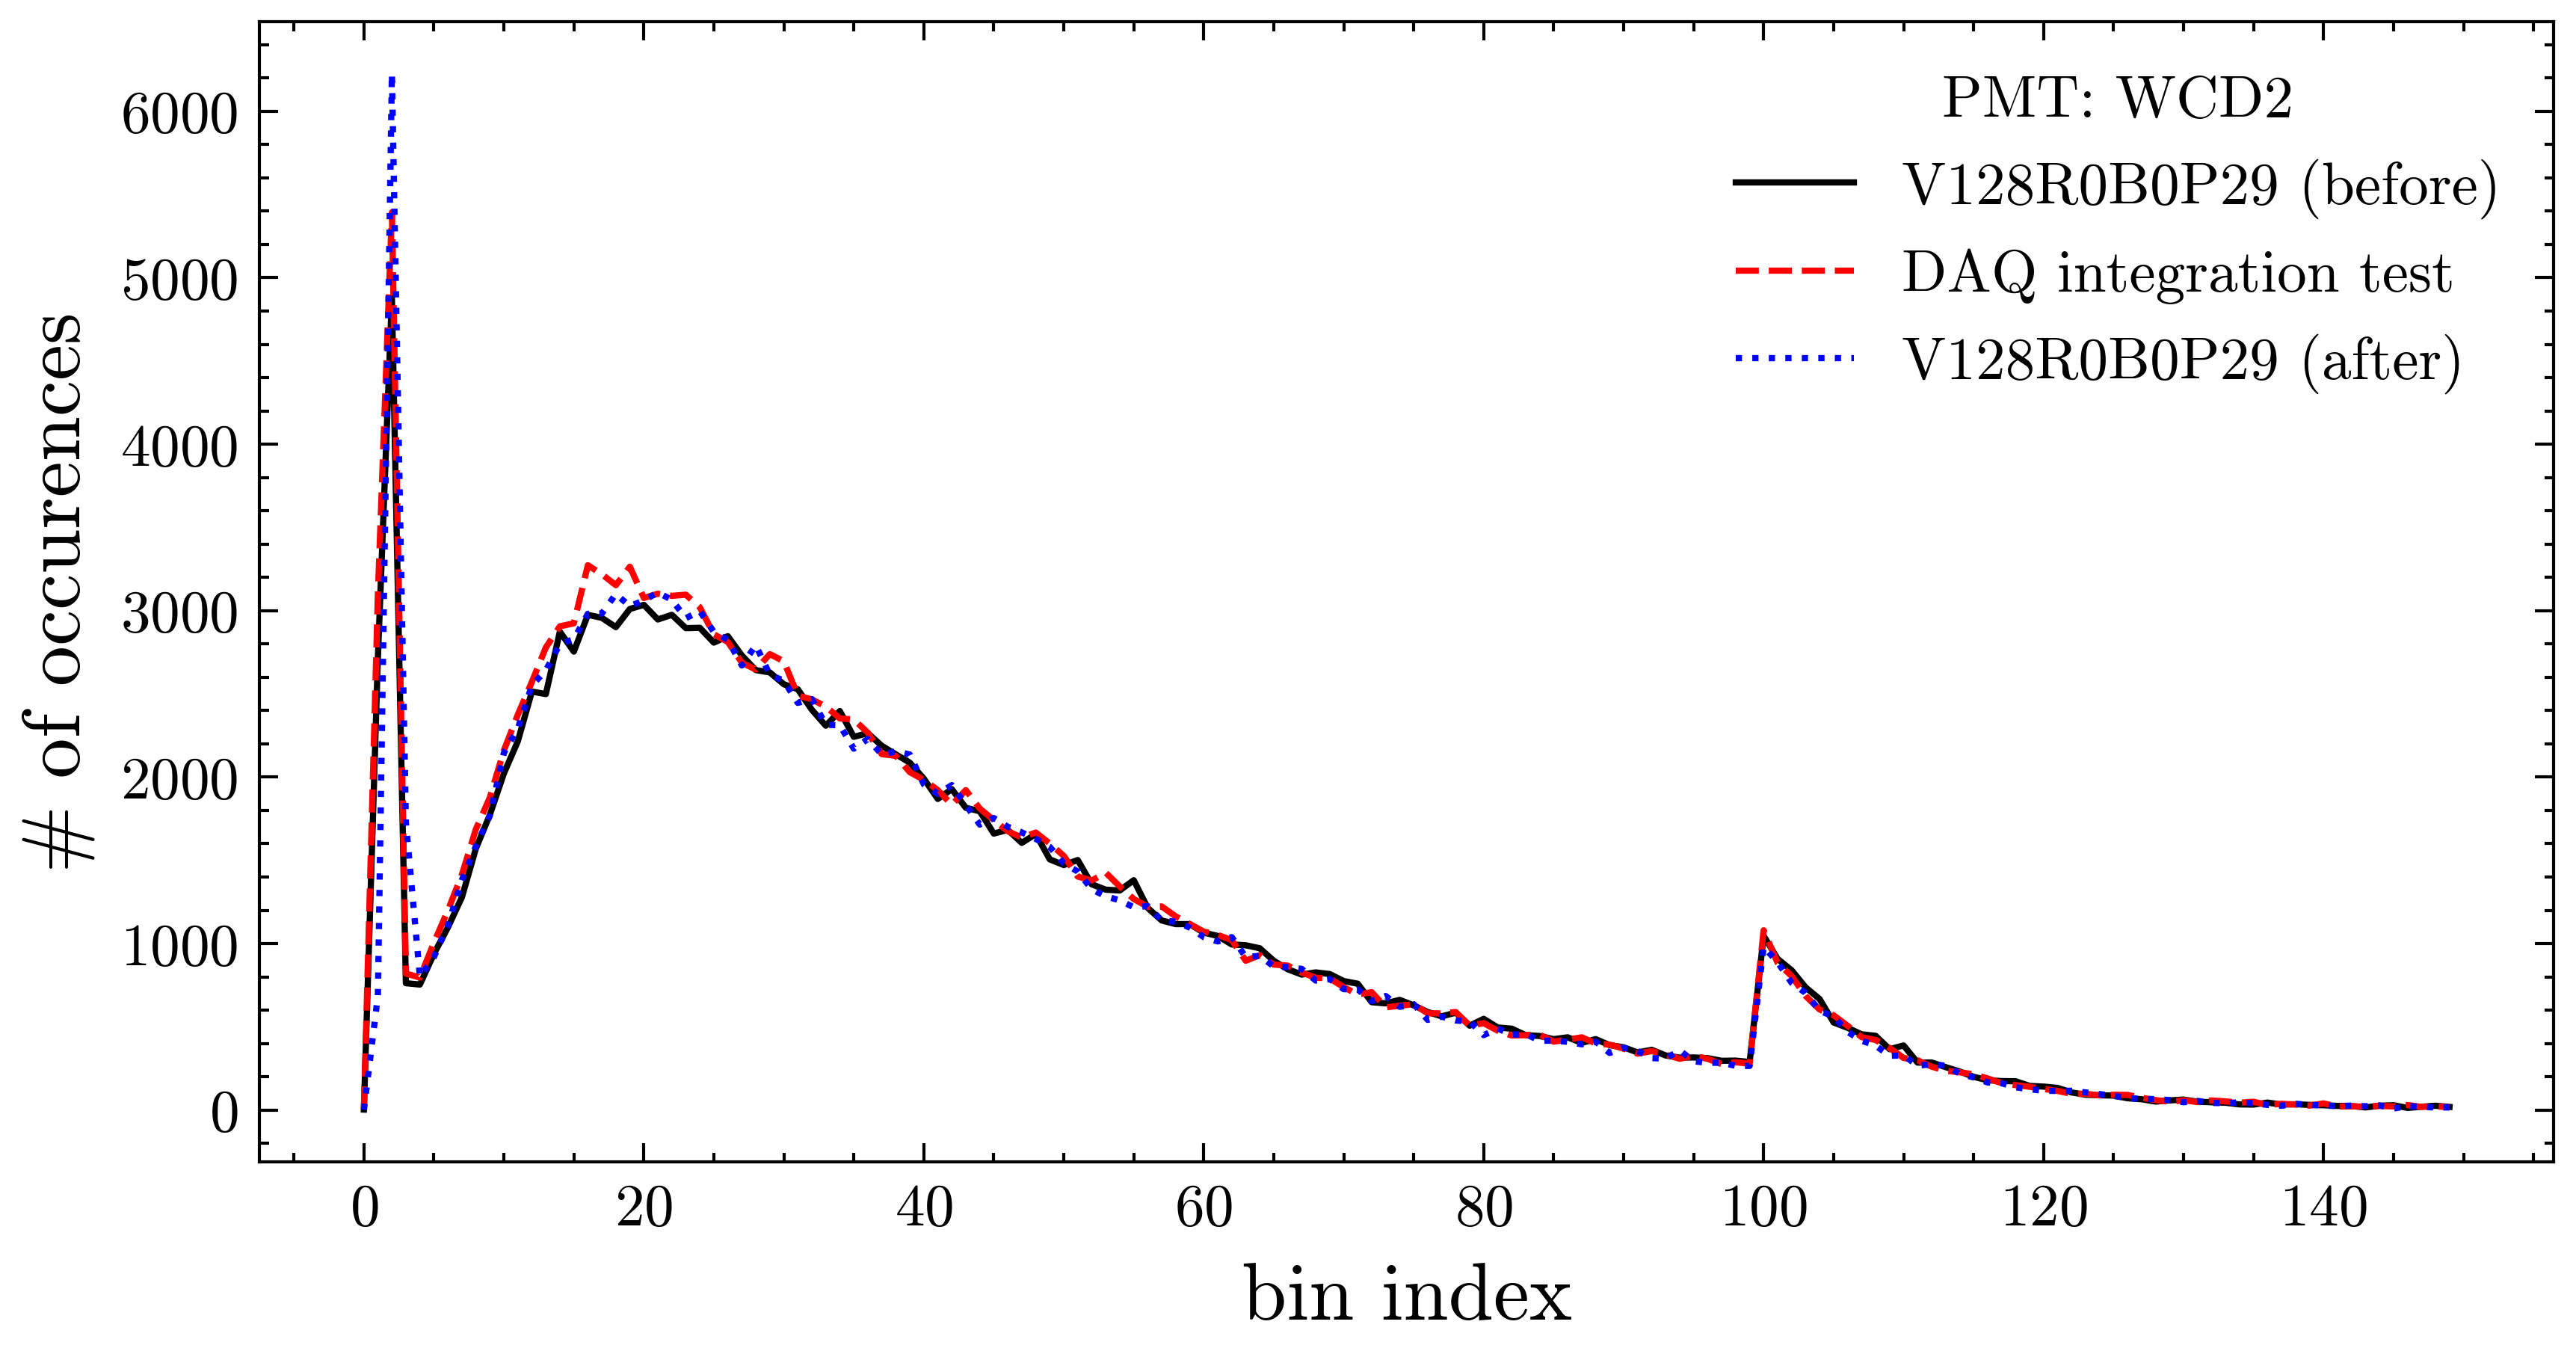

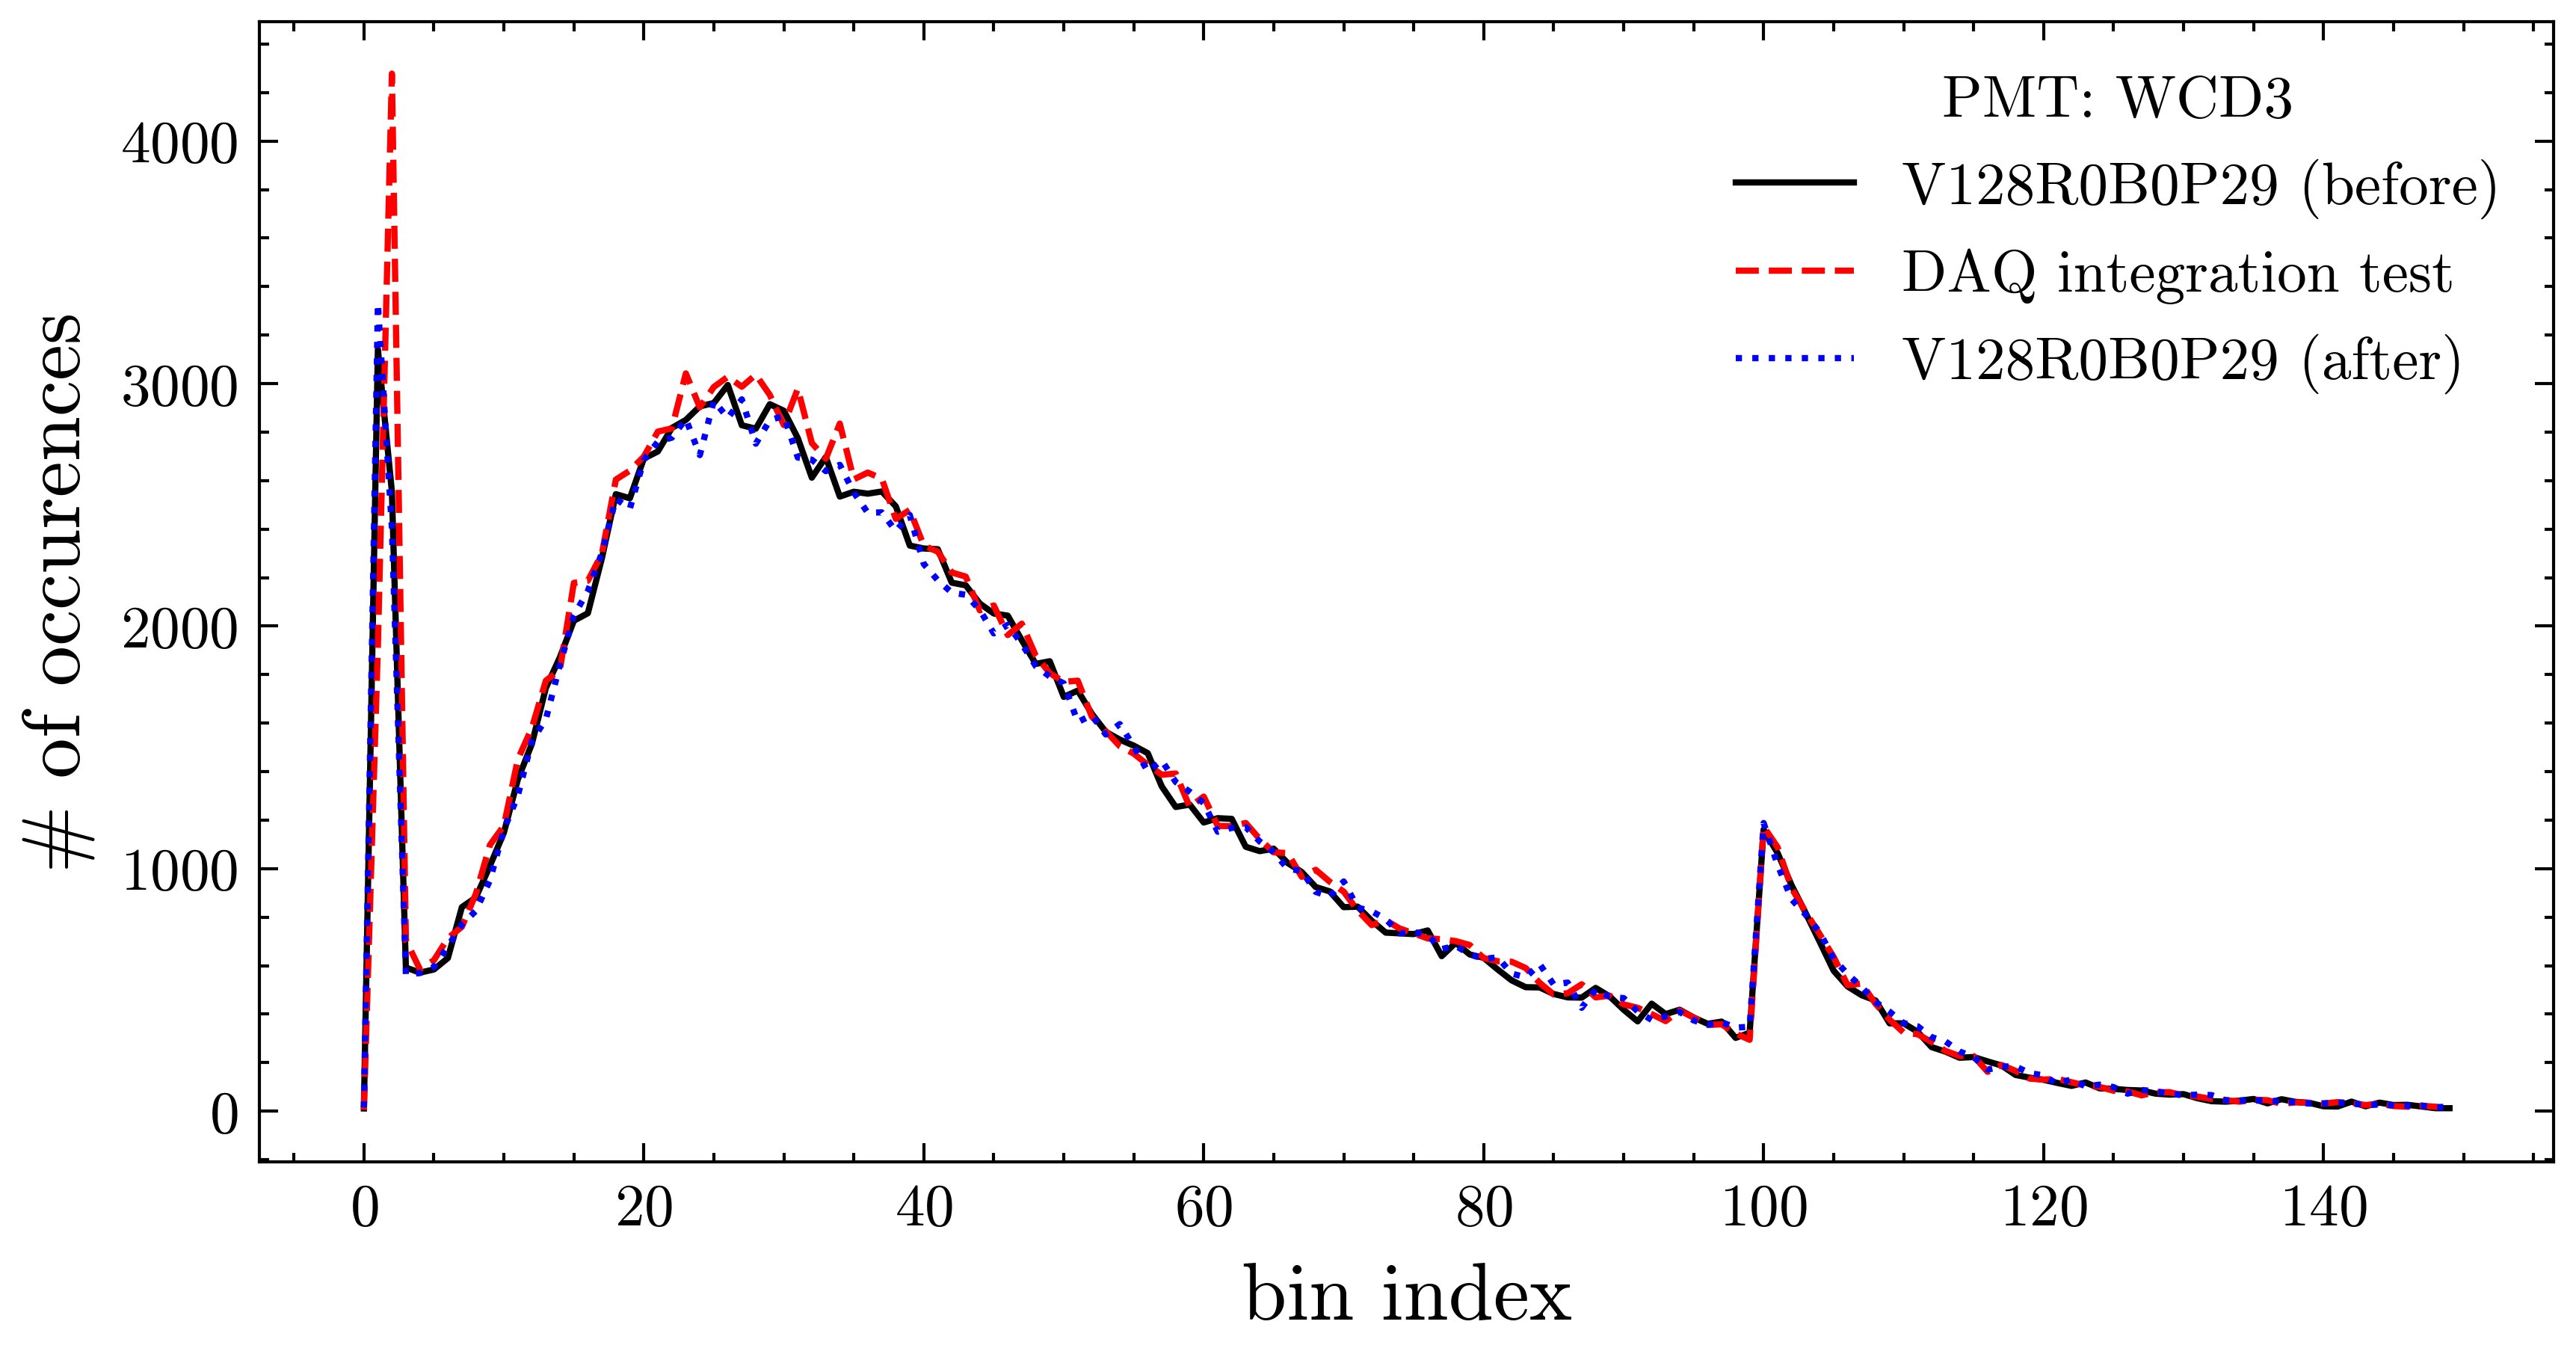

In [109]:
BINS = range(150)
title = ['SSD', 'WCD1', 'WCD2', 'WCD3']
for xxx, histo in zip(title, [ssds_histos, wcd1_histos, wcd2_histos, wcd3_histos]):

    ix = 15 if xxx != 'WCD1' else 14
    histo = histo.select('histo').to_numpy()

    plt.figure()
    plt.plot(BINS, histo[1][0], label='V128R0B0P29 (before)')
    plt.plot(BINS, histo[ix][0], label='DAQ integration test')
    plt.plot(BINS, histo[-1][0], label='V128R0B0P29 (after)')

    plt.ylabel('# of occurences')
    plt.xlabel('bin index')
    plt.legend(title=f"PMT: {xxx}")


In [115]:
print(np.diff(np.unique(time)))

print(np.unique(time))

[ 440.  565.  610.  122.  427.  610. 3807.  610.  122.  488.  610.  610.
  122.  488.  610.  549.  122. 3503.  164.  417.  610.  610.  122.  427.]
[1.41050720e+09 1.41050764e+09 1.41050821e+09 1.41050882e+09
 1.41050894e+09 1.41050937e+09 1.41050998e+09 1.41051378e+09
 1.41051439e+09 1.41051452e+09 1.41051500e+09 1.41051561e+09
 1.41051622e+09 1.41051635e+09 1.41051683e+09 1.41051744e+09
 1.41051799e+09 1.41051812e+09 1.41052162e+09 1.41052178e+09
 1.41052220e+09 1.41052281e+09 1.41052342e+09 1.41052354e+09
 1.41052397e+09]
